# 1. Importation des libraries utiles

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chisquare,chi2_contingency,chi2,ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
#pip install imblearn (package necessaire)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.preprocessing import  StandardScaler

# 2. Importation de la base de données et pré-traitements

In [44]:
data=pd.read_excel("Exam_ML_ISE-2.xlsx",sheet_name="JeuxDeDonnées")

In [28]:
data.shape

(1470, 35)

le jeu de données contient 1470 observations et 35 variables

In [29]:
data.head()

,Age,Attrition,Voyage_affaires,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Satisfaction_relationnelle,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1470 non-null   int64  
 1   Attrition                   1470 non-null   object 
 2   Voyage_affaires             1470 non-null   object 
 3   DailyRate                   1470 non-null   int64  
 4   Department                  1470 non-null   object 
 5   DistanceFromHome            1454 non-null   float64
 6   Education                   1470 non-null   int64  
 7   EducationField              1470 non-null   object 
 8   EmployeeCount               1470 non-null   int64  
 9   EmployeeNumber              1470 non-null   int64  
 10  EnvironmentSatisfaction     1470 non-null   int64  
 11  Genre                       1470 non-null   object 
 12  HourlyRate                  1470 non-null   int64  
 13  Implication_dans_emploi     1470 

In [31]:
data.isnull().sum()

Age                            0
Attrition                      0
Voyage_affaires                0
DailyRate                      0
Department                     0
DistanceFromHome              16
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Genre                          0
HourlyRate                     0
Implication_dans_emploi        0
JobLevel                       0
JobRole                        0
Satisfaction_travail           0
État_civil                     0
Revenu_mensuel                 0
MonthlyRate                    0
NumCompaniesWorked             0
Over18_Index                   0
Heures_supplémentaires         0
PercentSalaryHike              0
Évaluation_performance         0
Satisfaction_relationnelle     0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBa

Nous remarquons ici la présence de 16 valeurs manquantes pour la variable "DistanceFromHome".

In [32]:
data["DistanceFromHome"].describe()

count    1454.000000
mean        9.146492
std         8.083264
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

l'ecart-type étant relativement élevé par rapport à la moyenne  nous allons privilégier une imputation par la médiane de la distribution

In [33]:
median=data["DistanceFromHome"].median()
data["DistanceFromHome"].replace(np.NaN,median,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3800\2779277617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["DistanceFromHome"].replace(np.NaN,median,inplace=True)


In [34]:
data.isnull().sum()

Age                           0
Attrition                     0
Voyage_affaires               0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Genre                         0
HourlyRate                    0
Implication_dans_emploi       0
JobLevel                      0
JobRole                       0
Satisfaction_travail          0
État_civil                    0
Revenu_mensuel                0
MonthlyRate                   0
NumCompaniesWorked            0
Over18_Index                  0
Heures_supplémentaires        0
PercentSalaryHike             0
Évaluation_performance        0
Satisfaction_relationnelle    0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [35]:
data.columns

Index(['Age', 'Attrition', 'Voyage_affaires', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Genre', 'HourlyRate',
       'Implication_dans_emploi', 'JobLevel', 'JobRole',
       'Satisfaction_travail', 'État_civil', 'Revenu_mensuel', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18_Index', 'Heures_supplémentaires',
       'PercentSalaryHike', 'Évaluation_performance',
       'Satisfaction_relationnelle', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [39]:
#Séparation des variables quantitatives et des variables qualitatives pour une meilleure visibilité

cat =[ 'Attrition', 'Voyage_affaires',  'Department',
        'Education', 'EducationField',
        'EnvironmentSatisfaction', "Genre ",
       'Implication_dans_emploi', 'JobLevel', 'JobRole',
       'Satisfaction_travail', 'État_civil',
        'Over18_Index', 'Heures_supplémentaires',
        'Évaluation_performance',
       'Satisfaction_relationnelle',  'StockOptionLevel',
        'WorkLifeBalance',
       ]
num = ['Age',  'DailyRate', 
       'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber',  'HourlyRate',
        'Revenu_mensuel', 'MonthlyRate',
       'NumCompaniesWorked',
       'PercentSalaryHike',  'StandardHours', 
       'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [41]:
data[cat]

KeyError: "['Genre\\xa0'] not in index"

In [7]:
data[num]

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,Revenu_mensuel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1.0,1,1,94,5993,19479,8,11,80,8,0,6,4,0,5
1,49,279,8.0,1,2,61,5130,24907,1,23,80,10,3,10,7,1,7
2,37,1373,2.0,1,4,92,2090,2396,6,15,80,7,3,0,0,0,0
3,33,1392,3.0,1,5,56,2909,23159,1,11,80,8,3,8,7,3,0
4,27,591,2.0,1,7,40,3468,16632,9,12,80,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23.0,1,2061,41,2571,12290,4,17,80,17,3,5,2,0,3
1466,39,613,6.0,1,2062,42,9991,21457,4,15,80,9,5,7,7,1,7
1467,27,155,4.0,1,2064,87,6142,5174,1,20,80,6,0,6,2,0,3
1468,49,1023,2.0,1,2065,63,5390,13243,2,14,80,17,3,9,6,0,8


Notre base de données comporte 18 variables qualitatives et 17 variables quantitatives auxquelles nous allons procéder à la description

# 3. Description univariée des variables de la base

## 3.1. Analyse univariée des variables quantitatives

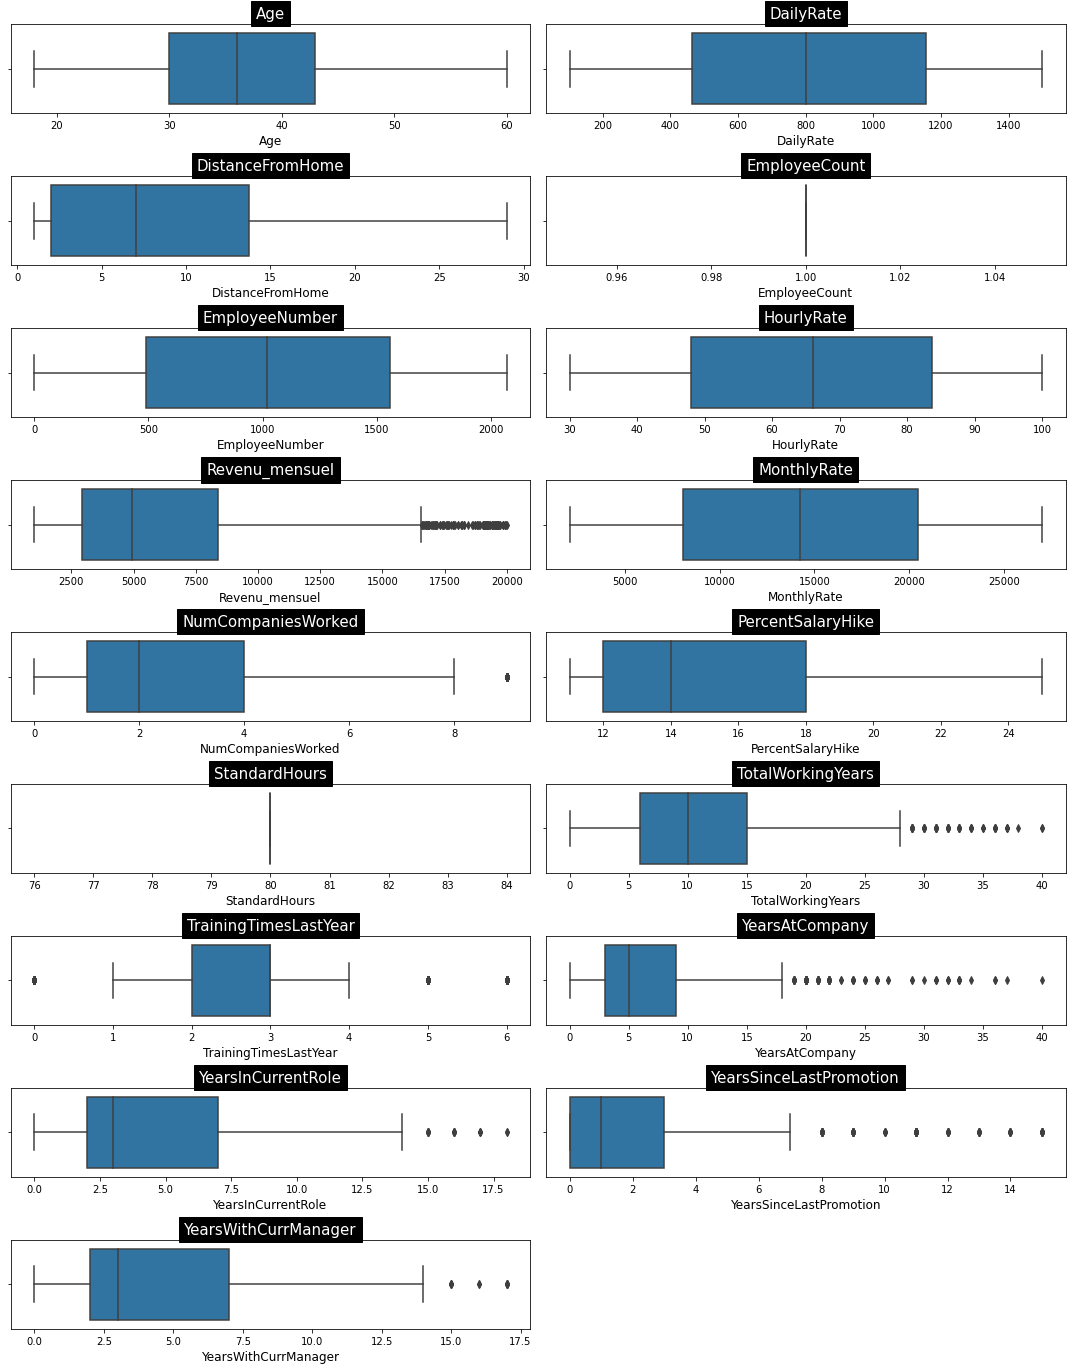

In [53]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = data)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

In [8]:
data[num].describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,Revenu_mensuel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.123129,1.0,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.042210,0.0,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,13.750000,1.0,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Pour la quasi totalité des variables, la médiane est très proche de la moyenne. On peut donc constater ici que les valeurs atypiques (qui sont relativement en très faible nombre ) ont un impact mineur sur notre distribution et peuvent donc être laissées telles qu'elles.

In [55]:
data[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   DailyRate                1470 non-null   int64  
 2   DistanceFromHome         1470 non-null   float64
 3   EmployeeCount            1470 non-null   int64  
 4   EmployeeNumber           1470 non-null   int64  
 5   HourlyRate               1470 non-null   int64  
 6   Revenu_mensuel           1470 non-null   int64  
 7   MonthlyRate              1470 non-null   int64  
 8   NumCompaniesWorked       1470 non-null   int64  
 9   PercentSalaryHike        1470 non-null   int64  
 10  StandardHours            1470 non-null   int64  
 11  TotalWorkingYears        1470 non-null   int64  
 12  TrainingTimesLastYear    1470 non-null   int64  
 13  YearsAtCompany           1470 non-null   int64  
 14  YearsInCurrentRole      

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'Revenu_mensuel'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>],
       [<Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsInCurrentRole'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>],
       [<Axes: title={'center': 'YearsWithCurrManager'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

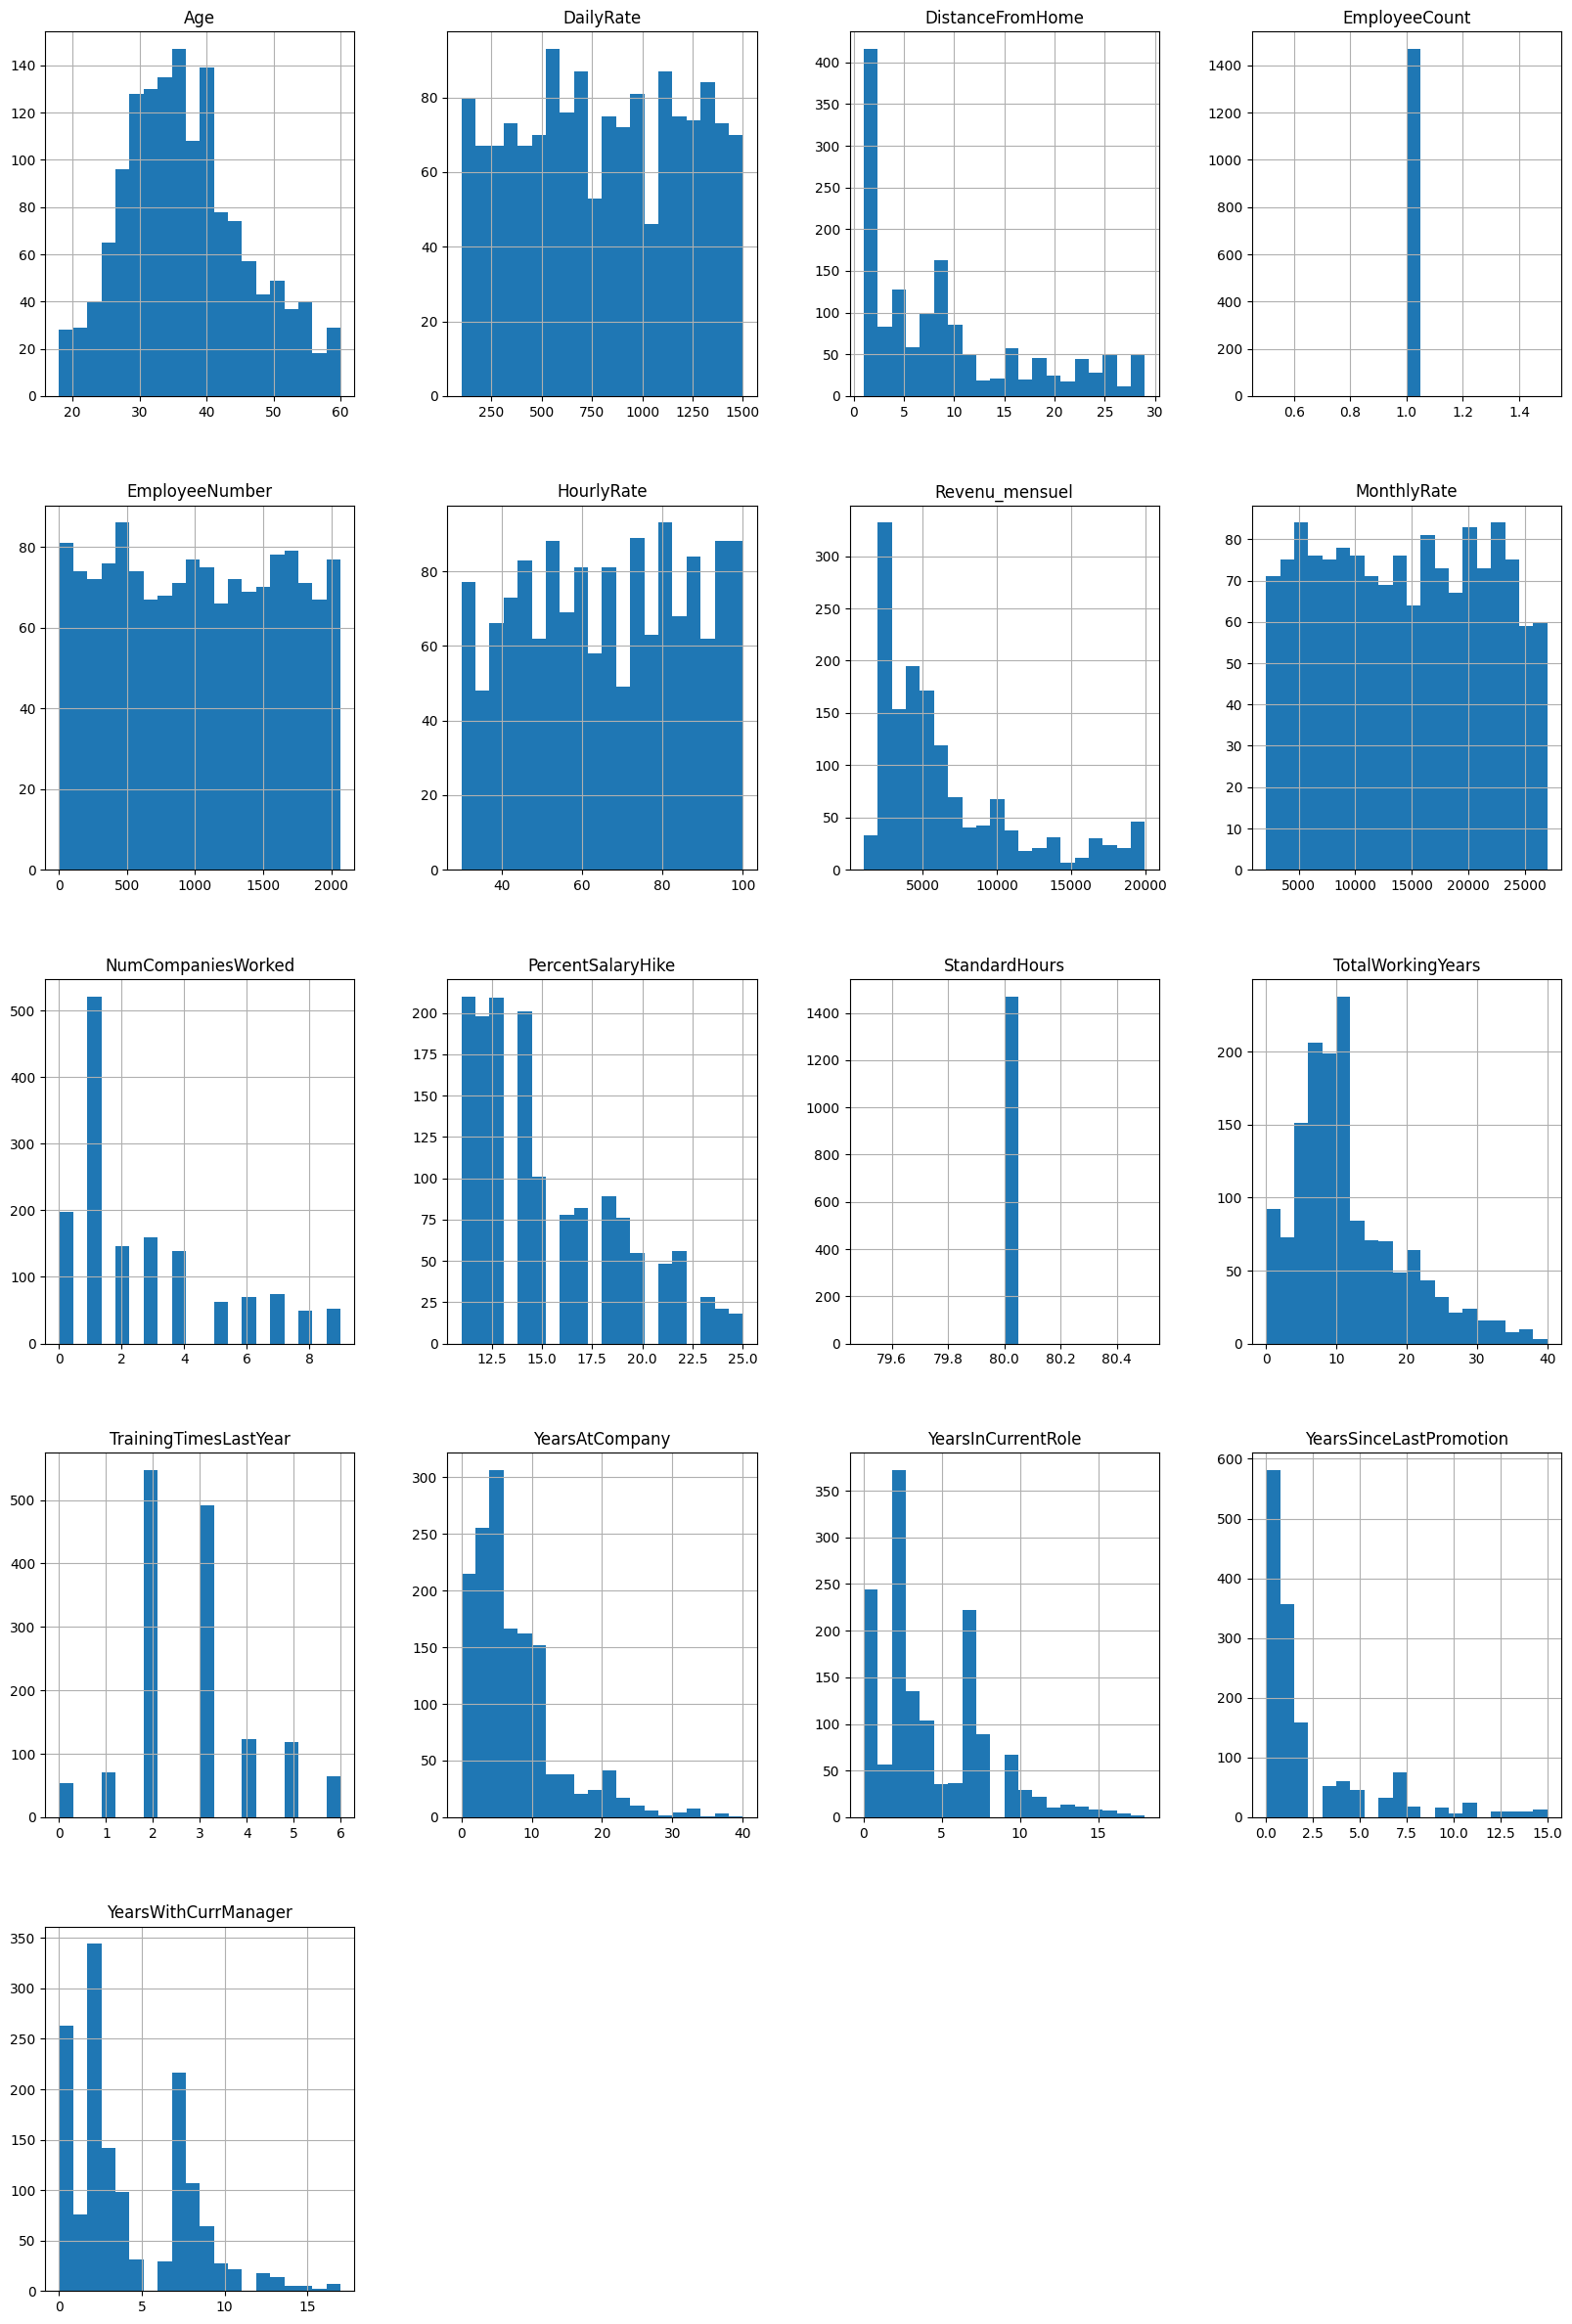

In [9]:
data[num].hist(figsize=(20,30),bins=20)

* La distribution d’Age est relativement homogène sur l'ensemble de la population d'intérêt avec une moyenne de 36 ans et un coefficient de variation de 25%.Tous les individus ont au moins 18 ans et 50% sont âgés de plus de 36 ans. Le doyen des employés de cette entreprise a 60 ans. Enfin l'histogramme suggère que la plupart des individus ont entre 30 et 40ans.
* Avec un coefficient de variable relativement élevé (50%) la distribution de la variable DailyRate est assez hétérogène. En moyenne, un employé coute en taux horaire à l'entreprise environ 802 dollars qui dans ce cas est sensiblement égale à la médiane; ce montant pouvant atteindre les 1500 dollars dans certains cas.
* La variable DistanceFromHome varie entre 1 et 29 avec une moyenne de 9.12 ; ce qui signifie que l'employé le plus proche de son lieu de service est à 1Km et le plus éloigné à 29km. La médiane de la distribution se situe à 7 traduisant que 50% des employés vivent à plus de 7km de leur lieu de travail.
* La variable Employecount a une valeur unique égale à 1 et ne fournit pas d'informations pertinentes.
* La variable HourlyRate est relativement équitablement bien distribué entre les employés. Un employé recoit en moyenne 65.89 dollars en taux horaire et ce ci pouvant aller jusqu'à 100 dollars pour certains employés. Tout les employés sont payés au moins 30 dollars de l'heure et 50% d'entre eux touchent plus de 66 dollars en taux horaire.
* La variable NumCompaniesWorked nous indique que la plupart des employés sont relativement novice en terme d'entreprises côtoyées auparavant. En effet, plus de 35% des employés ont travaillé dans une seule entreprise avant de rejoindre celle-ci , et pour 15% des employés cette entreprise est la première dans laquelle ils travaillent. Toutefois quelques employés ont tout de même travaillé pour beaucoup d'entreprises avant de rejoindre celle-ci (pouvant aller jusqu'à 9 entreprises) bien qu'ils soient en faible nombre.
* La distribution du revenu mensuel suggère qu'elle est inéquitablement repartie dans l'entreprise; en effet "très peu ont beaucoup et beaucoup ont peu".
Bien qu'en moyenne les individus touchent environ 6502.93 dollars, il faut noter que la moitié des employés touchent moins de 4919 dollars par mois tandis que qu'une autre partie (1/4) touchent plus de 8400 dollars par mois  et 10% plus de 13775 dollars par mois. Les salariés les mieux rémunérés atteignent les 26999 dollars environ mensuellement.
* La variable standardsHours prend une valeur unique 80 et ne donne donc pas d'informations pertinentes.
* Il revient de la variable TotalWorkingYears que les employés sont plutot expérimentés en effet, 3 employés sur 4 dans l'entreprise a au moins 6 ans d'expérience professionnelle et 1 sur 4 en a aumoins 15. Les plus expérimentés de la boite sont dotés de 40 ans d'expérience bien  qu'ils sont très peu.
La forme de la tendance est sensiblement la même pour ce qui est du nombre d'années de travail dans la compagnie(YearsAtCompany) dans la mesure où 3 employés sur 4 ont au moins 3 années d'expérience au sein de la boite, 1 employé sur 2 au moins 5. Certains, les doyens de l'entreprises sont en poste depuis près de 40ans.
* En moyenne un employé a fait environ 4 ans à son poste actuel bien que 3 employé sur 4 ont deja fait plus de 7 ans au même poste; la plus part ayant été promu il y'a moins de 3 ans. Enfin, on remarque que la plupart des individus ont commencé à travaillé très recemment avec leur manageur actuel ( moins de 3ans ).







Nous allons dans la suite de notre problème supprimer les variables  prenants des valeurs uniques ou qui n'apporte pas d'informations pertinentes. Il s'agit de : EmployeCount,StandardHours. De plus tout les employés sont âgés d'au moins 18 ans ainsi la variable over_18 nest pas pertienentes pour la suite

In [7]:
data.drop(['EmployeeCount','EmployeeNumber','Over18_Index','StandardHours'],axis=1,inplace=True)
num.remove("EmployeeCount")
num.remove("EmployeeNumber")
num.remove("StandardHours")
cat.remove("Over18_Index")

## 3.2. Analyse univariée des variables qualitatives

In [58]:
def without_hue(ax,feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x,y), size=12)

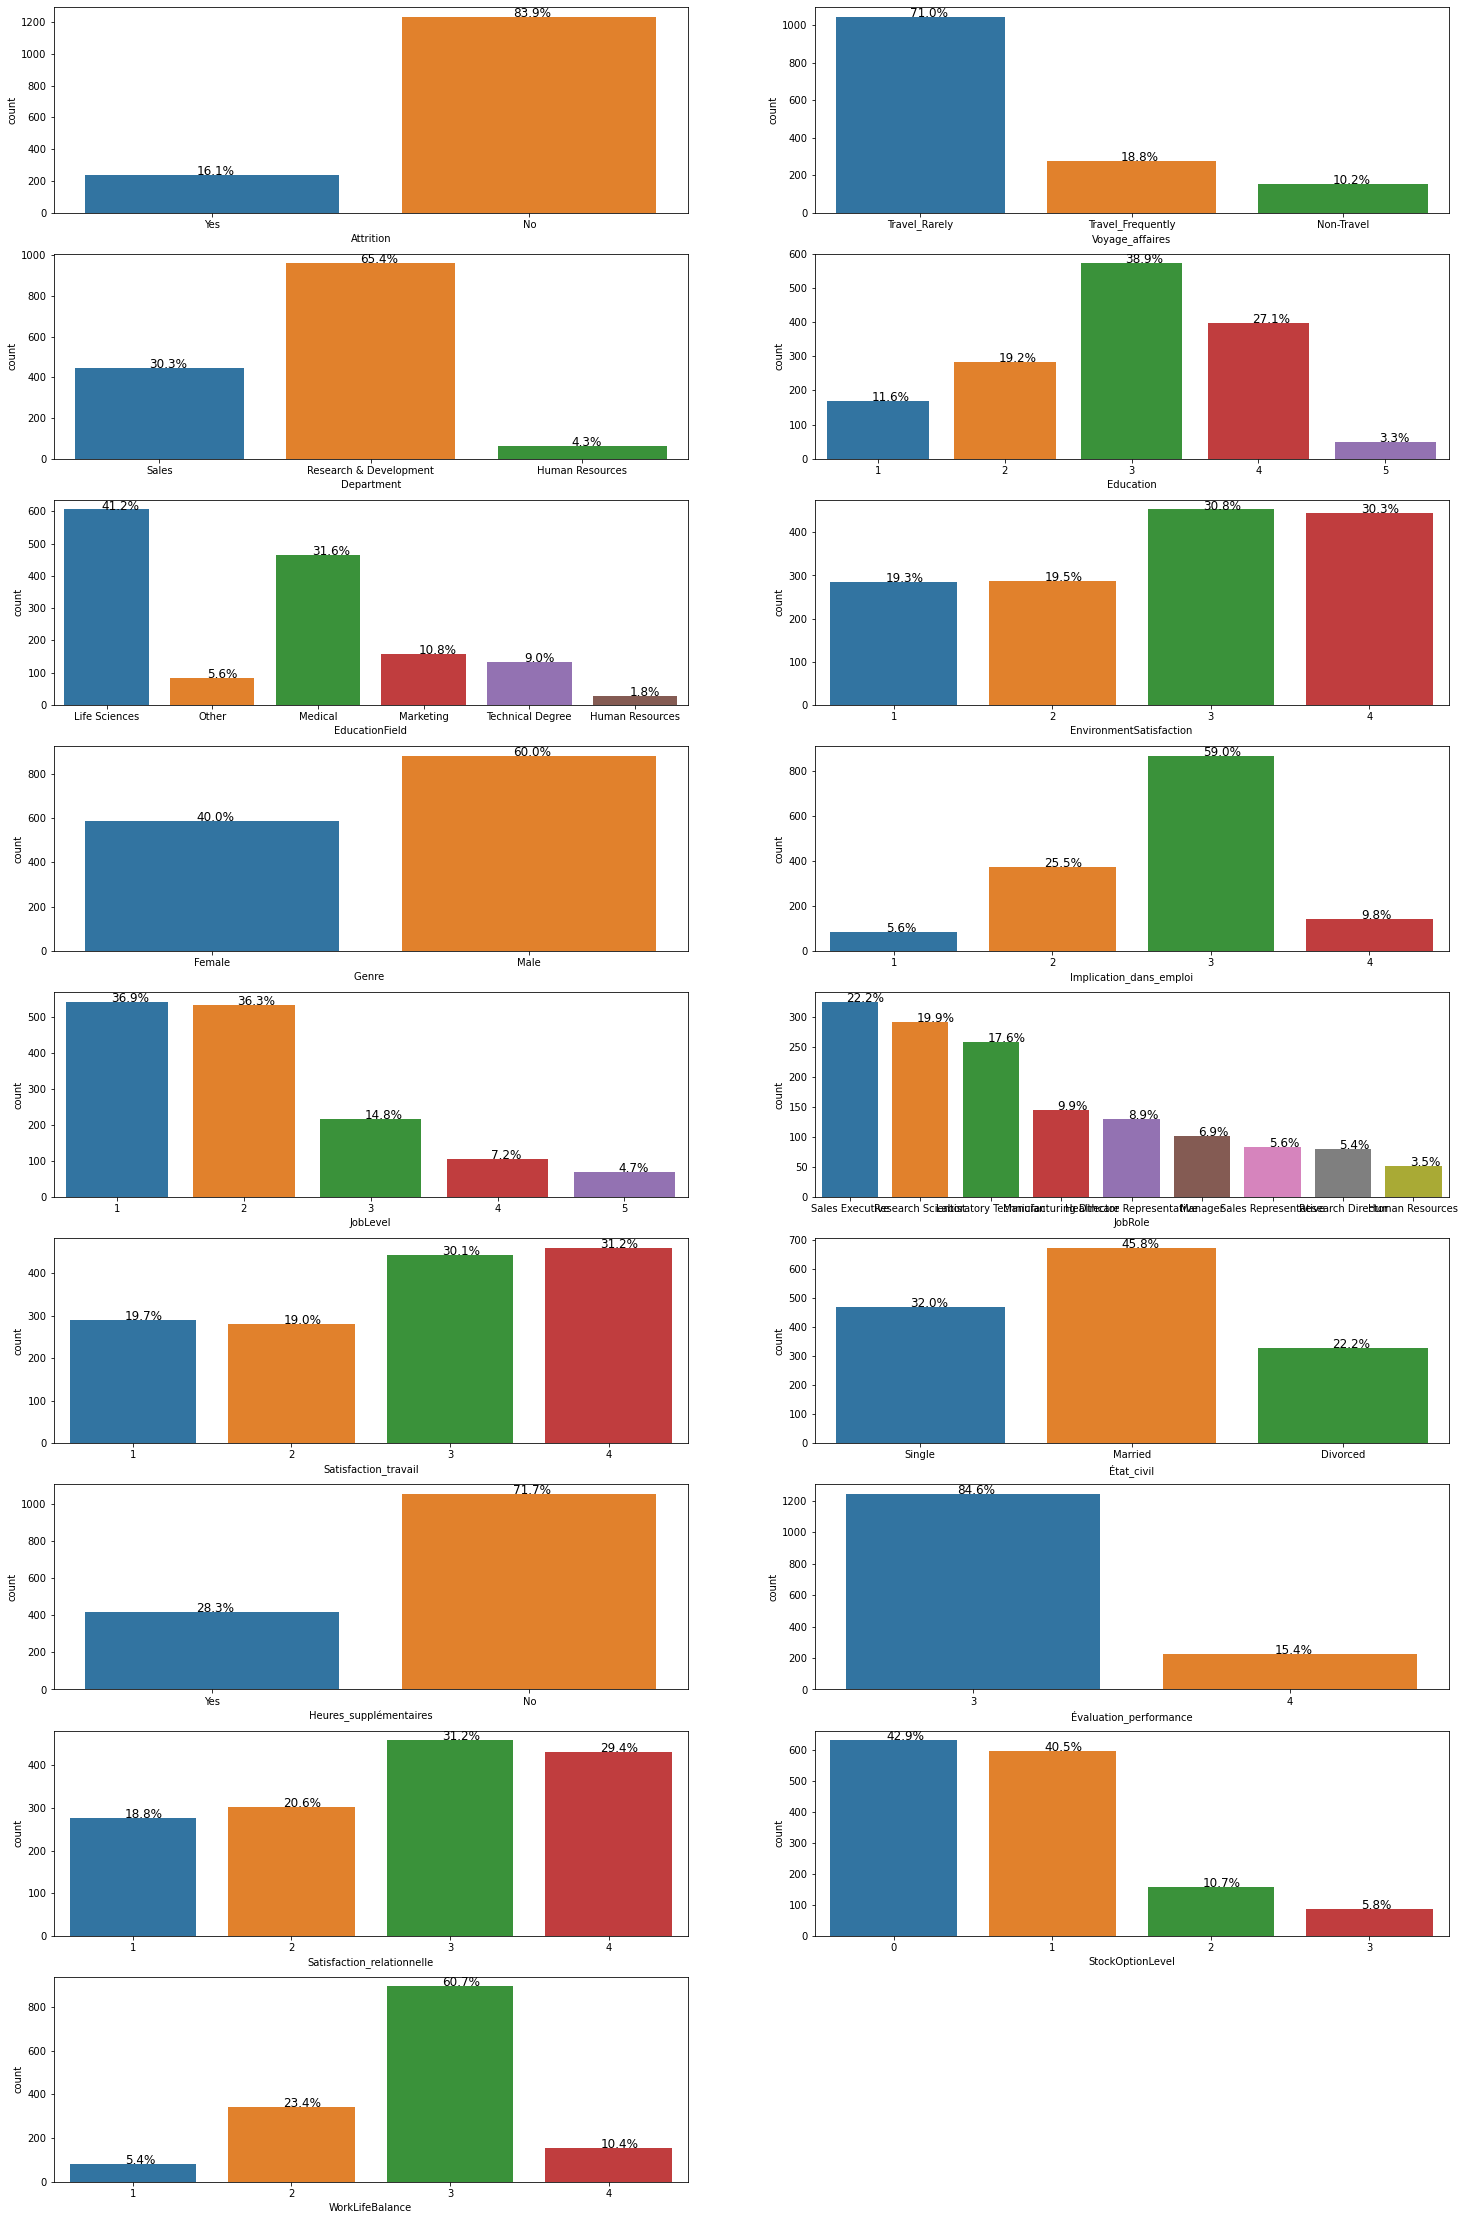

In [59]:
plt.figure(figsize = (25,40))
for idx, i in enumerate(cat):
    plt.subplot(9, 2, idx + 1)
    ax = sns.countplot(x=data[i])
    without_hue(ax,data[i])
plt.show()

* **Attrition** \
Cette variable qui est notre variable cible prends prend deux modalité à savoir: `oui` si la personne a quitté l'entreprise et non Sinon. Sur les 1470 employés, 16.1% ont quitté l'entreprise soit 237 employés.\
***
* **Voyages d'affaires** \
Il s'agit de la fréquence à laquelle l'employé a voyagé pour l'entreprise. Cette variable prends 3 modalités: `Non Travel`, `Tavel_Rarely` et `Travel_Frequently`. Le mode ici est la modalité Travel_Rarely. en effet, un peu plus de 3 employés sur 10 voyagent rarement tandis qu'un peu plus de 2 employés sur 10 voyagent regulierement pour le compte de l'entreprise.\
***
* **Department** \
Trois departements sont relévés dans cette entreprise: `Recherche et Developpement` qui regroupe 65.4% des employés , `Ventes` avec 30.3% des employés  et `Ressources Humaines`. 
***
* **Education** \
L'entreprise rassemble les employés de cinq niveau d'études répartis comme suit: niveau inferieur au college, collège, licence, master et doctorat. le graphique montre que les niveaux d'étude les plus prépondérents sont licence et master qui rassemblent à eux seul 66% des employés de cette entreprise.
***
* **EducationField** \
Cette variable represente la spécialité des employés. On peut voir que les spécialités les plus retrouvées chez les employées de l'entreprise sont: `Ressources humaines` (41,2%), `Medical` (31,6%) et `Marketing` (10,8%).
***
* **EnvironnementSatisfaction** \
Deux grands groupes peuvent se distinguer ici: les employés satisfait de leur environnement qui representent 61,1% des employés de l'entreprise et ceux qui sont moins satisfait de leur environnement (satisfaction moyenne et faible).
***
* **Genre** \
Les hommes sont les plus employés au sein de cette entre prise  soit 882 hommes contre 588 femmes.
***
* **Implication_dans_emploi** \
Le niveau d'implication dans le travail est mésuré sur une echelle de 1 à 5 où 1 represent le niveau le plus faible d'implication. Dans cette entreprise un peu moins de 3 employés sur 5 ont un niveau d'implication 3 alors que 5,6% des emmployés sont tres peu impliqués dans leur travail.
***
* **JobLevel** \
les postes les plus bas (poste junior par exemple) sont ceux ou on retrouvent le plus des employés(73,2%).
***
* **JobRole** \
Les postes les plus prépondérents dans cette entreprise sont: `Sales executive` (22,2%), `Research_Scientist` (19,9%) et `Laboraty Technician` (17,6%).
***
* **Satisfaction_Travail** \
Il s'agit du dégré de satisfaction d'un employé par rapport à son travail. Ici encore on peut distinguer deux grands groupes: ceux qui sont plutot satisfait de leur travail ils representent 61,3% de l'ensemble des employés. et ceux qui ne sont pas satisfaits par leur travail (satisfaction moyenne ou faible).
***
* **Etat_civil** \
La classe la plus prepondérente ici est celle des mariés où on retrouve 45,8% des employés ensuite vient la classe des célibataires avec 32%. Les divorcé quant à eux ne représentent que 22,2% de l'ensemble des employés.
***

* **Heures_Supplementaires** \
Cette variable determine si l'employé a eu à effectuer des heures supplémentaire ou pas. Ainsi, un peu moins de trois employés sur dix ont effectué des heures supplémentaires dans cette entreprise.
***
* **Evaluation_performance** \
A ce niveau, une note est attribuée aux performances de l'employé. Elle est mésurée selon l'echelle suivante: 1 (faible), 2 (Bon), 3 (excellent) et 4 (exceptionnel). Dans cette entreprise, on retrouve uniquement les employés de performance `excellent` (84,6%) et `exceptionnelle`.
***
* **Satisfaction_relationnelle** \
Le niveau de satisfation relationnelle des employés est mésuré sur une echelle de 1 à 4. Dans cette entreprise, les employés sont majoritairement satisfait (satisfaction élevée et très élevée) des relations entretenus au sein de leur lieu de travail. Ainsi, 60,6% des employés sont satisfaits.
***
* **Stock_Option_Level** \
Il s'agit du niveau d'options d'achats de l'employés dans l'entreprise. L'option la plus retrouvée ici est l'option `0` avec 42,9% ensuite vient l'option `1` qui regroupe 40,5% des employés.
***
* **Work_life_Balance** \
Il s'agit d'un indicateur de l'équilibre entre vie professionnelle et vie privée de l'employé mésuré sur une echelle de 1 (mauvais) à 4 (très élevé). 60% des employés de cette entreprise equilibre de manière excellente leur vie professionnelle et privée.

Ayant procédé aux analyses descriptives univariées, il est d'actualité de s'intéresser à d'éventuelles liaisons pouvant exister avec notre variable d'interet.

# 4. Description bivariée des variables de la base

## 4.1. Analyse bivariée des variables quantitatives

Dans cette partie, on étudie la liaison entre chaque variable quantitative et notre variable targuet afin de retenir celles qui sont liées à notre variable.
Pour ce faire, nous allons proceder par une approche graphique suivi d'un test de Student.

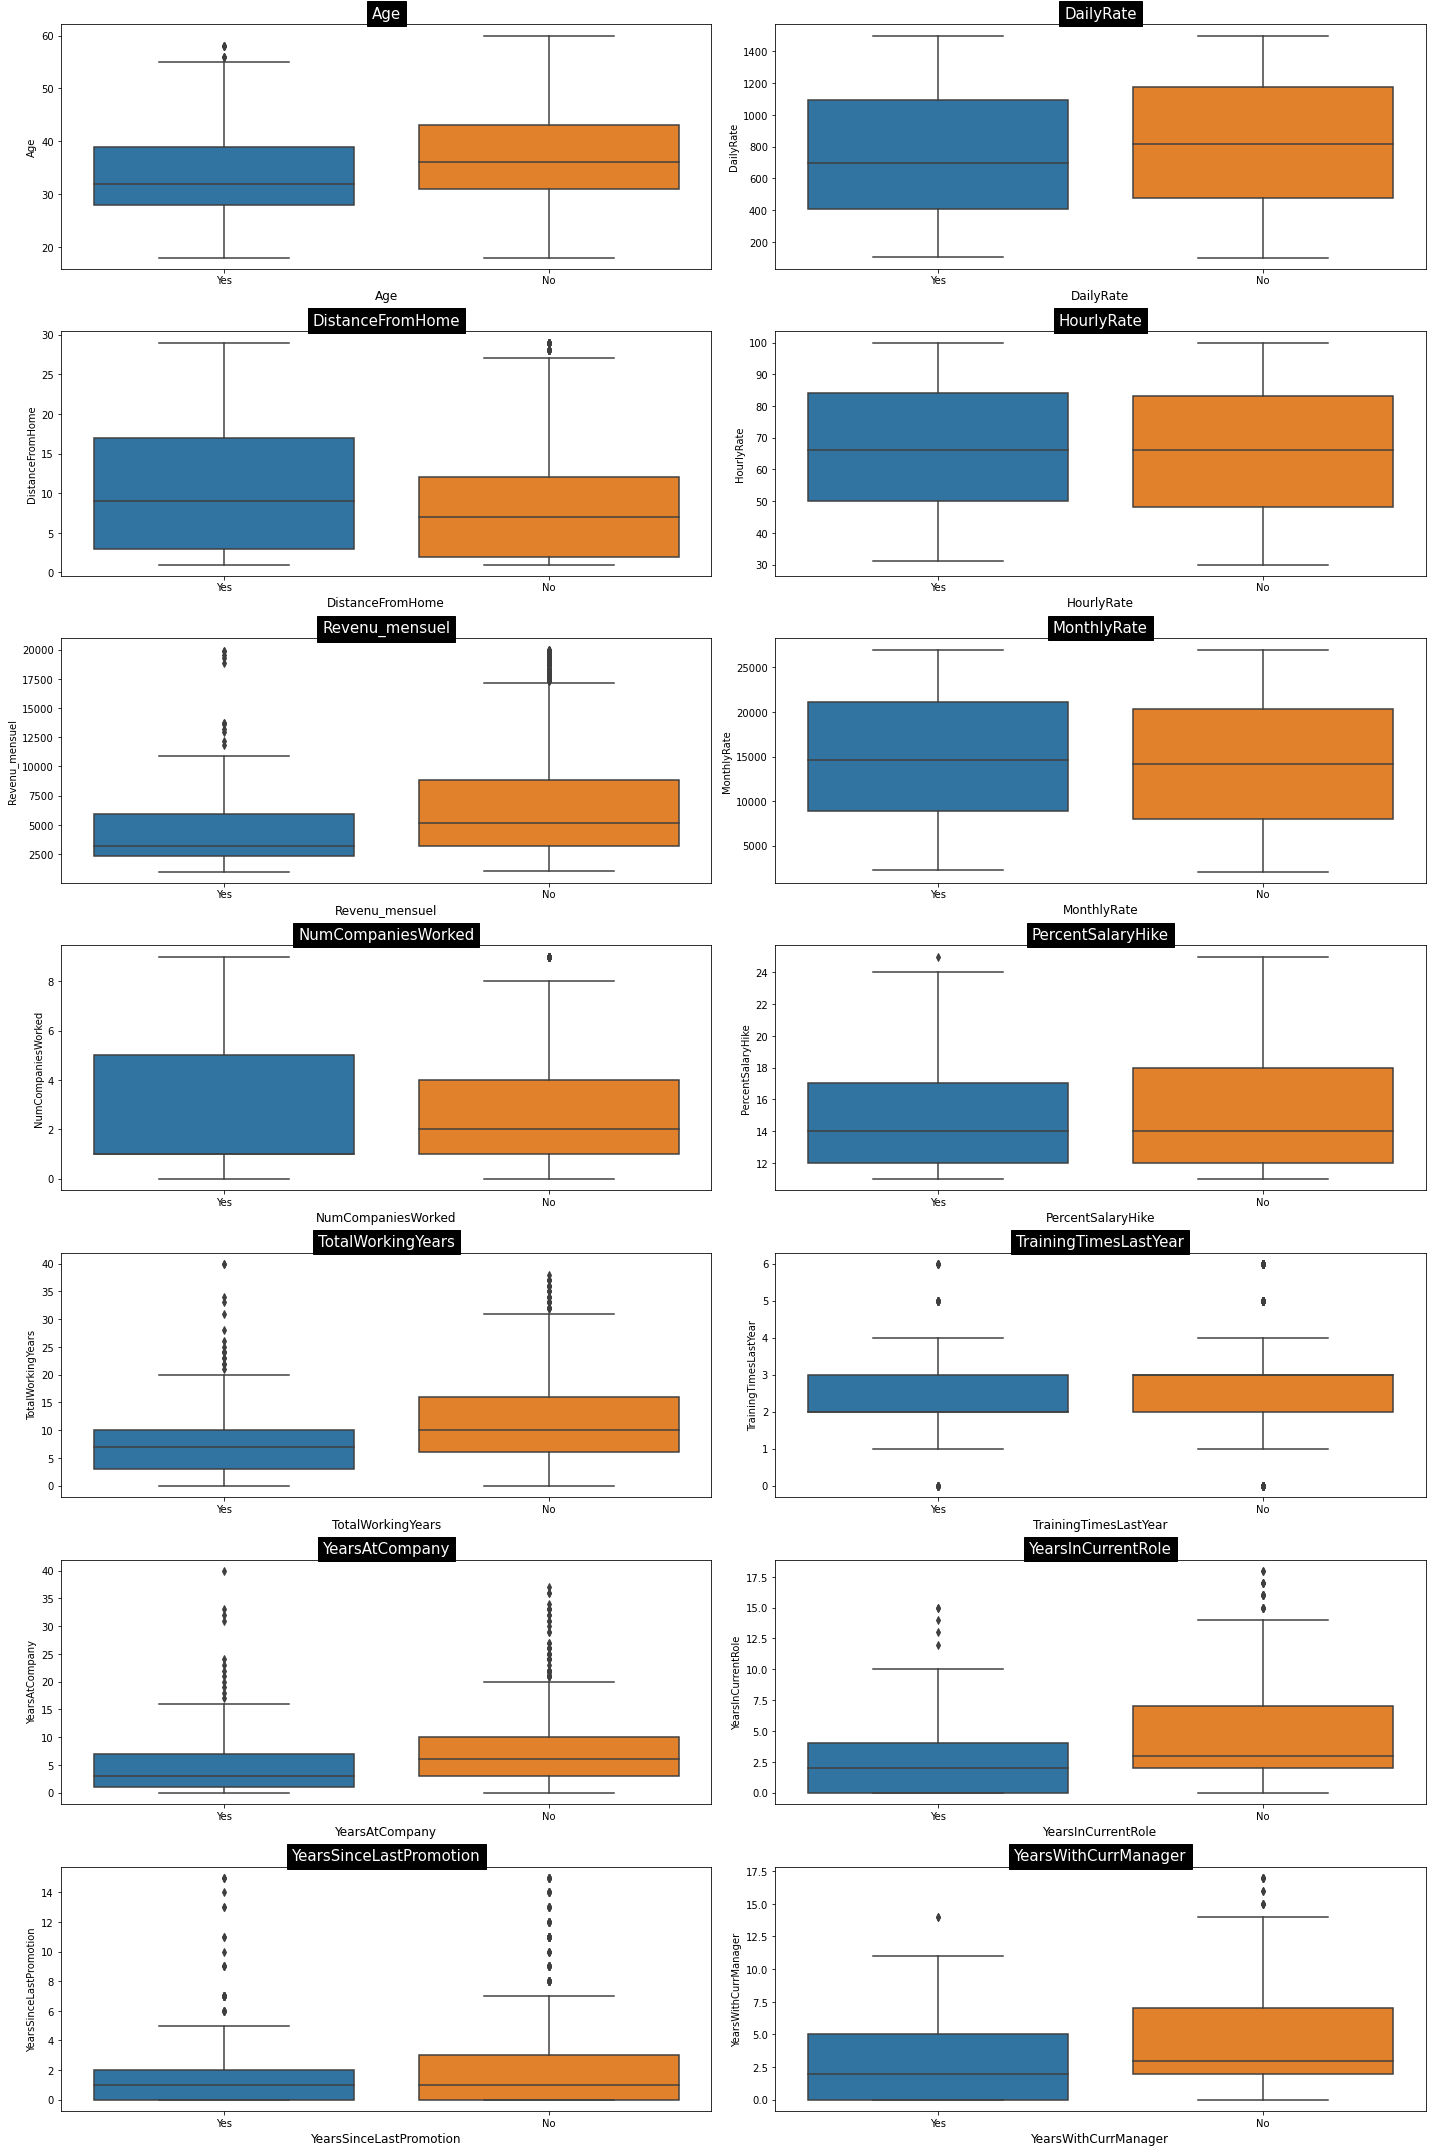

In [60]:
plt.figure(figsize = (20,30))
for idx, i in enumerate(num):
    plt.subplot(7, 2, idx + 1)
    sns.boxplot(y = i, data = data,x="Attrition")
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

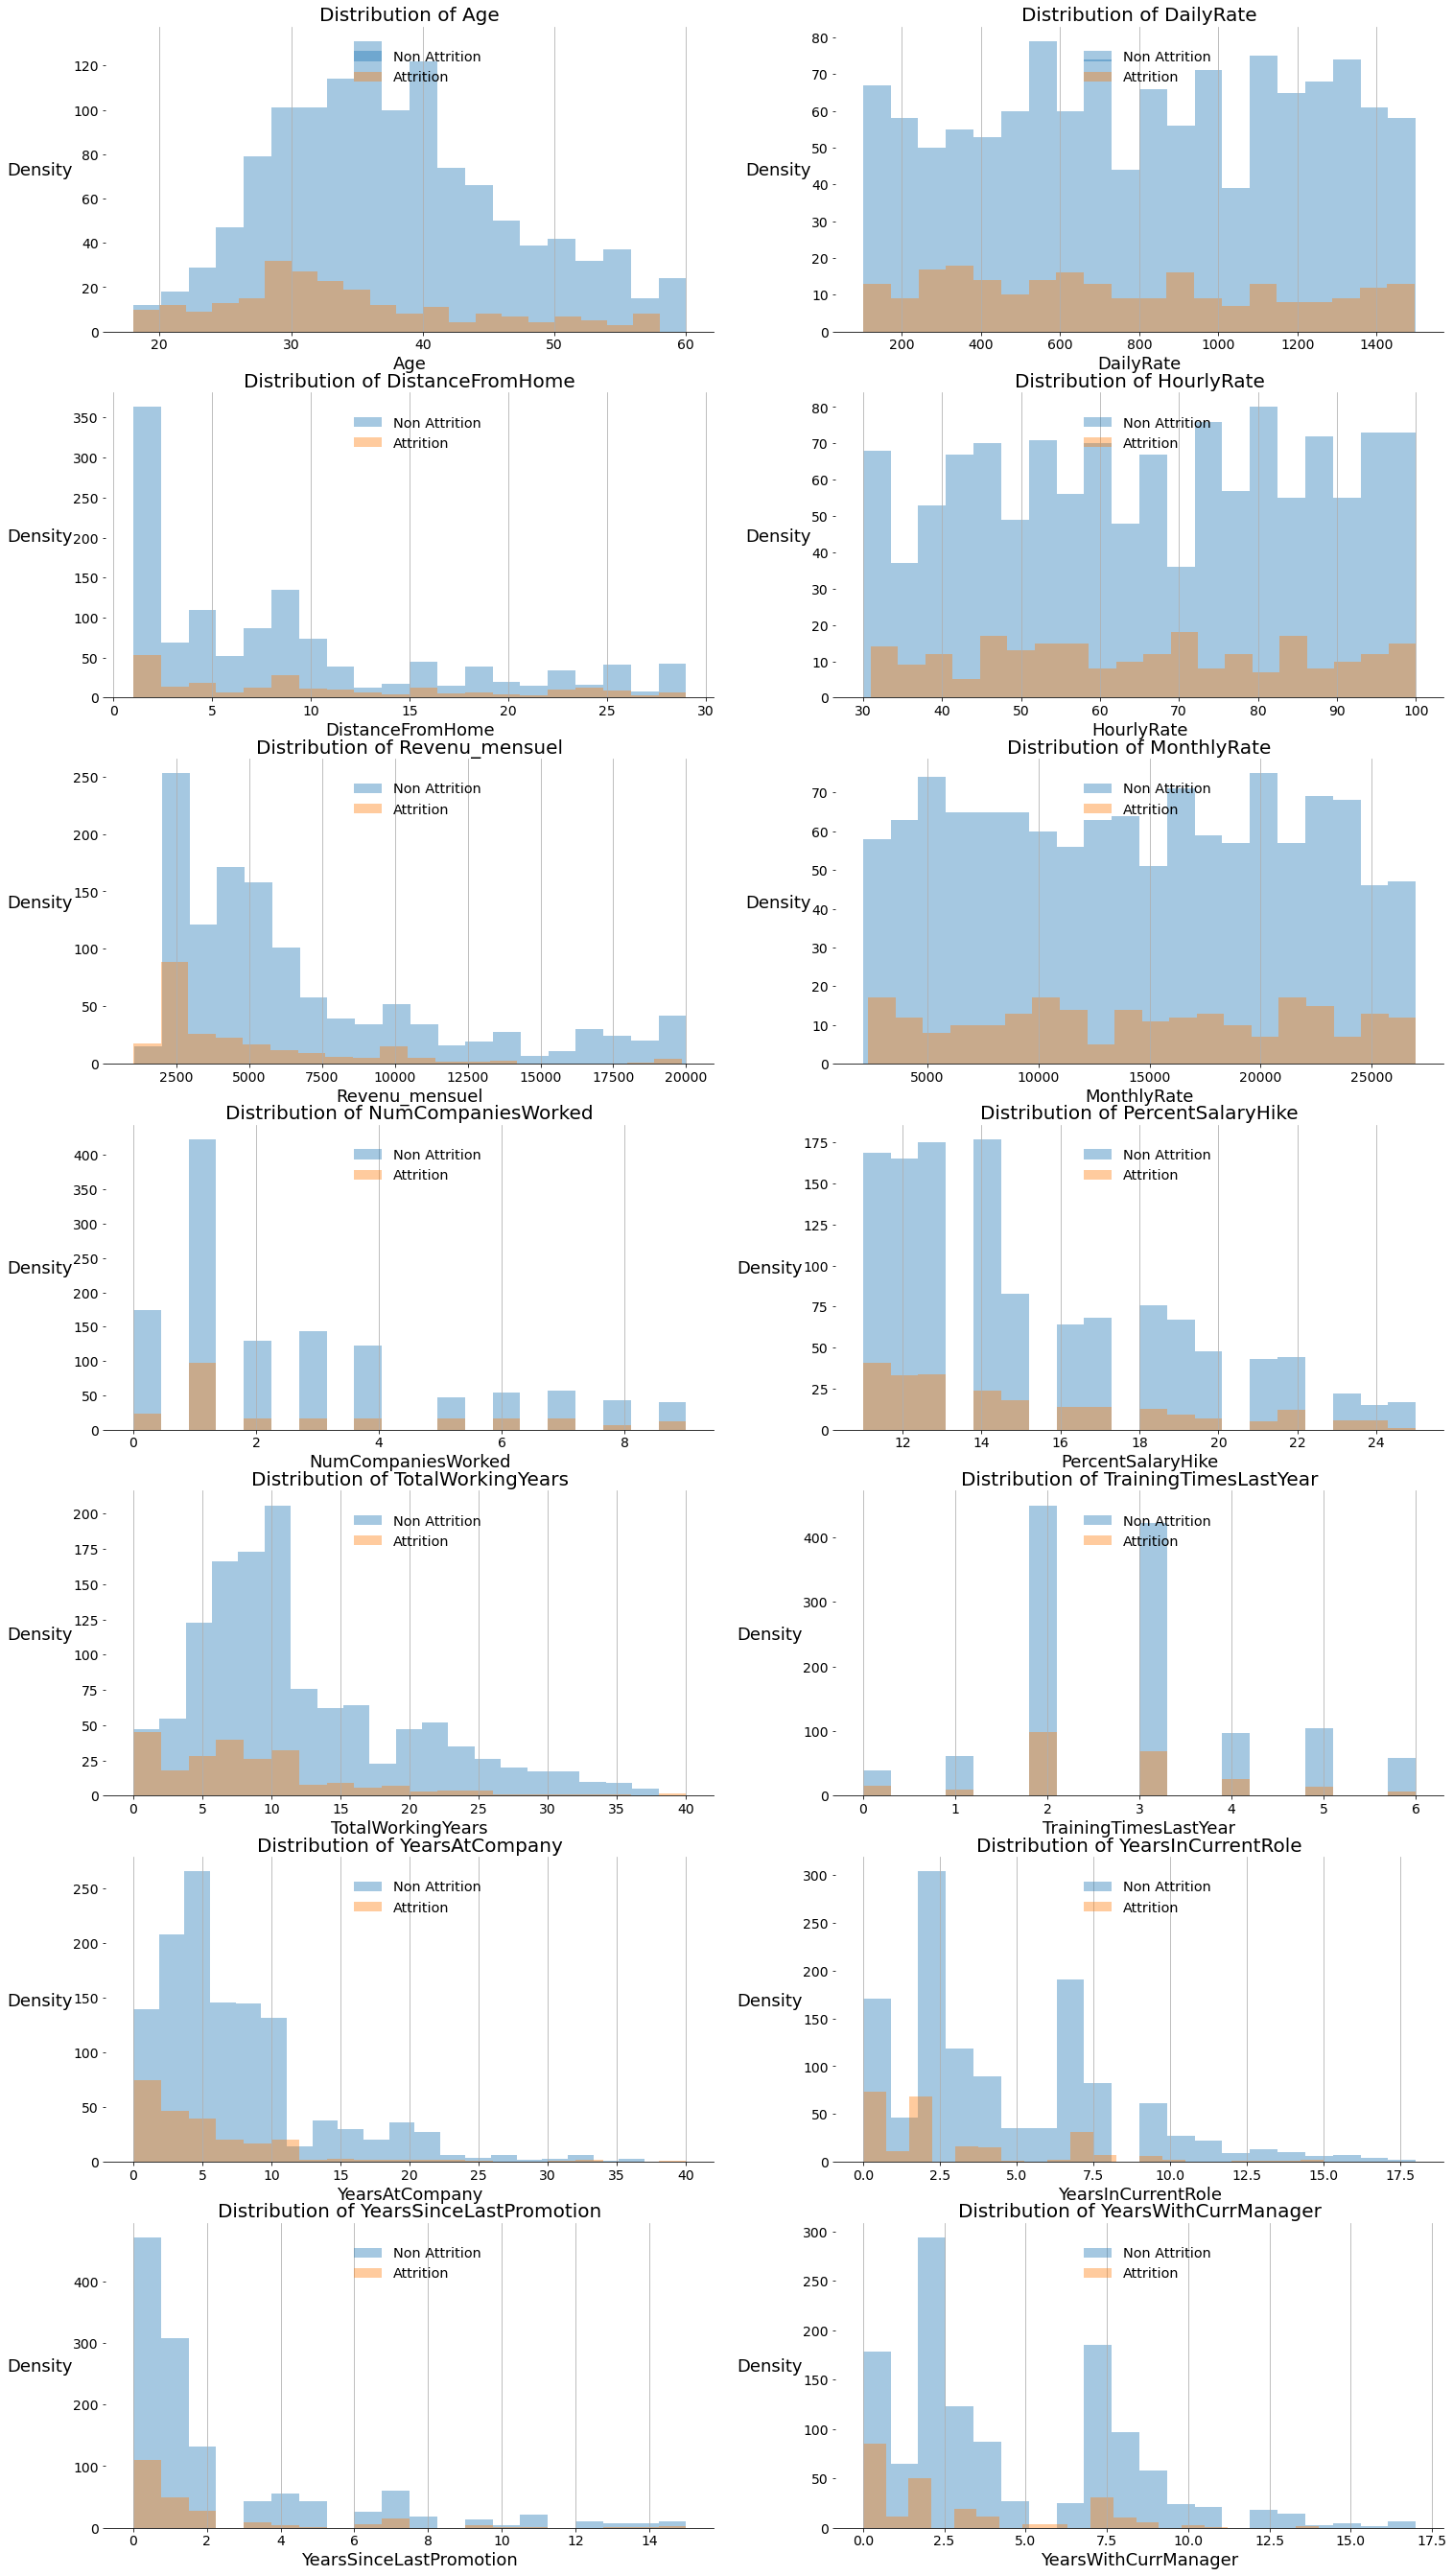

In [61]:
plt.figure(figsize=(25,55))
for idx, i in enumerate(num):
    plt.subplot(8, 2, idx + 1)
    fig = sns.distplot(data[data['Attrition'] == "No"][i], label='Non Attrition', kde=0, bins=20)
    sns.distplot(data[data['Attrition'] == "Yes"][i], label='Attrition', kde=0, bins=20)
    sns.despine(left=1)
    fig.grid(axis='x')
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Density',fontsize=18, rotation=0)
    fig.yaxis.labelpad = 30
    plt.title('Distribution of {}'.format(i),fontsize=20);
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    fig.yaxis.labelpad = 35
    plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
plt.show()

* Les boxplots des âges nous suggèrent que les personnes qui démissionnent sont relativement plus jeunes que celles qui ne démisionnenent pas.En effet, l'histogramme des âges renseigne sur le fait que la majorité des démissionnaires ont moins de 35 ans environ et sont donc relativement jeunes.
* Les personnes qui démissionnent sont la plupart du temps plus éloignés du travail que les personnes qui ne le font pas. Comme illustrations, pendant que 75% des personnes non démissionnaires vivent à moins de 10km environ du travail, 50% des démissionnaires vivent à plus de 9km environ du lieu de service
* Les revenus mensuels des personnes demissionnaires sont très faible par rapport à celui des personnes non-demisionnaires.En effet 1 demissionnaire sur 2 a un salaire mensuel inférieur à 3000$.Tandisque parmi les non démissionnaire 1 personne sur 2 a un salaire mensuel supérieur à 5000$.
* Pour les variables "TotalWorkingYears" et "YearsAtCompany" on observe que les boxplots pour les demssionnaires sont relativement plus bas que ceux des non demissionnaires; ce qui traduit que les personnes qui sont relativment nouveaux dans le milieu du travail et/ou dans l'entreprise ont tnedance à demissionner par rapport aux personnes qui ont une longue expérience professionnelle.
* De même le nombre d'années passées au poste actuel, le nombre d'années passées avec le manager actuel , chez les demissionnaires est relativement bas par rapport à ce qui est observé chez les non-démisionnaires.
* Pour le reste des autres variables, les boxplots sont relativement alignés , ce qui suggère qu'il y'a une absence de liaison flagrante entre ces variables et la variable "Attrition" qui caractérise le départ ou la démission des employés.

In [62]:
corr=data[num].corr()
corr

,Age,DailyRate,DistanceFromHome,HourlyRate,Revenu_mensuel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.002782,0.024287,0.497855,0.028051,0.299635,0.003634,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.007914,0.023381,0.007707,-0.032182,0.038153,0.022704,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.002782,-0.007914,1.000000,0.027462,-0.018829,0.025369,-0.031766,0.047621,-0.000790,-0.037204,0.005686,0.017884,0.005963,0.014345
HourlyRate,0.024287,0.023381,0.027462,1.000000,-0.015794,-0.015297,0.022157,-0.009062,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
Revenu_mensuel,0.497855,0.007707,-0.018829,-0.015794,1.000000,0.034814,0.149515,-0.027269,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.025369,-0.015297,0.034814,1.000000,0.017521,-0.006429,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.031766,0.022157,0.149515,0.017521,1.000000,-0.010238,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.047621,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
TotalWorkingYears,0.680381,0.014515,-0.000790,-0.002334,0.772893,0.026442,0.237639,-0.020608,1.000000,-0.035662,0.628133,0.460365,0.404858,0.459188
TrainingTimesLastYear,-0.019621,0.002453,-0.037204,-0.008548,-0.021736,0.001467,-0.066054,-0.005221,-0.035662,1.000000,0.003569,-0.005738,-0.002067,-0.004096


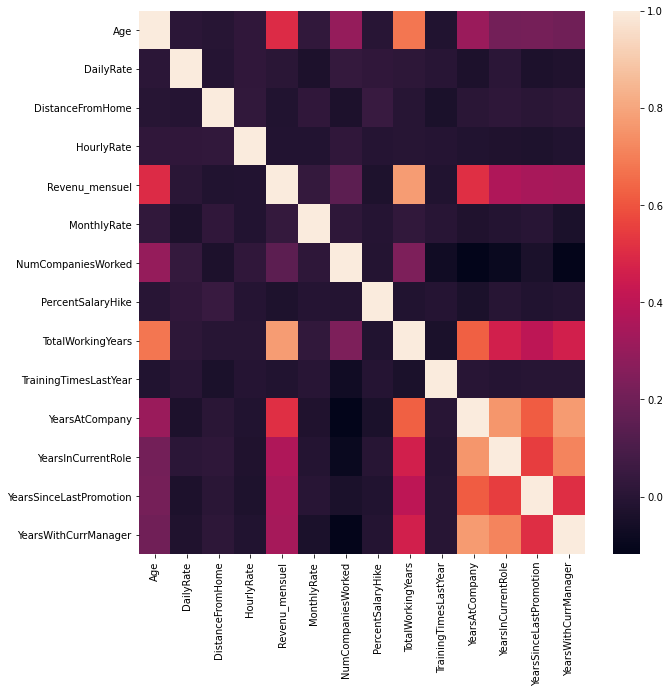

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

In [6]:
#test pour ne retenir que les variables quantitatives significativement liées à la variable Attrition
for i in num :
    student_t,student_pvalue=ttest_ind (data[data["Attrition"]=="Yes"][i] , data[data["Attrition"]=="No"][i])
    alpha=0.05
    if(student_pvalue<=alpha):
        print(i)

Age
DailyRate
DistanceFromHome
Revenu_mensuel
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsWithCurrManager


c:\Users\Hp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## 4.2. Analyse bivariée des variables qualitatives

Dans cette partie, on étudie la liaison entre chaque variable qualitative et notre variable targuet afin de retenir celles qui sont liées à notre variable.
Pour ce faire, nous allons proceder par une approche graphique suivi d'un test d'indépendance du chi 2.

In [8]:
cat2 = list(cat)
del cat2[cat2.index('Attrition')]
for a in cat2 :
    sns.catplot(
        data=data[cat], y=a, hue="Attrition", kind="count",
        palette="pastel", edgecolor=".3",
    )

KeyError: "['Genre\\xa0'] not in index"

In [9]:
#renvoie les variables qualitatives significativment liées à notre variable d'intérêt Attrition.
for a in cat2:
    stata, p, dof , expectect= chi2_contingency(pd.crosstab(data["Attrition"],data[a] ))
    alpha=0.05
    if(p<=alpha):
        print(a)

Voyage_affaires
Department
EducationField
EnvironmentSatisfaction
Implication_dans_emploi
JobLevel
JobRole
Satisfaction_travail
État_civil
Heures_supplémentaires
StockOptionLevel
WorkLifeBalance


L'analyse descriptive bivariée nous a permis de détecter les variables non liées à notre variable d'intérêt que nous allons donc supprimer de la base

In [12]:
data.columns

Index(['Age', 'Attrition', 'Voyage_affaires', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Implication_dans_emploi', 'JobLevel',
       'Satisfaction_travail', 'Revenu_mensuel', 'Heures_supplémentaires',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'État_civil_Married', 'État_civil_Single'],
      dtype='object')

In [11]:
data.drop(columns=[ 'HourlyRate','MonthlyRate','Genre','NumCompaniesWorked','PercentSalaryHike','Education','YearsSinceLastPromotion','Évaluation_performance','Satisfaction_relationnelle'],axis=1,inplace=True)

Avant de procéder à la modélisation proprement dite, il est primordial de recoder l'ensemble de nos variables quanlitatives en variables quantitatives
* Les variables de nature ordinale seront encodées suivant une échelle ordinale(0,1,2,...)
* Les variables de nature nominale seront traitées via la méthode des get_dummies

In [13]:

data["Attrition"]=data["Attrition"].replace("No",0)
data["Attrition"]=data["Attrition"].replace("Yes",1)

data["Heures_supplémentaires"]=data["Heures_supplémentaires"].replace("No",0)
data["Heures_supplémentaires"]=data["Heures_supplémentaires"].replace("Yes",1)

data["Voyage_affaires"]=data["Voyage_affaires"].replace("Non-Travel",0)
data["Voyage_affaires"]=data["Voyage_affaires"].replace("Travel_Rarely",1)
data["Voyage_affaires"]=data["Voyage_affaires"].replace("Travel_Frequently",2)

dum =[  'Department',
         'EducationField',
       'JobRole',
        'État_civil',
      ]

data=pd.get_dummies(data=data,columns=dum,drop_first=True)


KeyError: "None of [Index(['Department', 'EducationField', 'JobRole', 'État_civil'], dtype='object')] are in the [columns]"

In [69]:
data.head()

,Age,Attrition,Voyage_affaires,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Implication_dans_emploi,JobLevel,Satisfaction_travail,Revenu_mensuel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,État_civil_Married,État_civil_Single
0,41,1,1,1102,1.0,2,3,2,4,5993,...,0,0,0,0,0,0,1,0,0,1
1,49,0,2,279,8.0,3,2,2,2,5130,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1,1373,2.0,4,2,1,3,2090,...,0,1,0,0,0,0,0,0,0,1
3,33,0,2,1392,3.0,4,3,1,3,2909,...,0,0,0,0,0,1,0,0,1,0
4,27,0,1,591,2.0,1,3,1,2,3468,...,0,1,0,0,0,0,0,0,1,0


# 5. Modélisation

In [10]:
#normalisation des données pour une meilleure prédiction
x=data.drop(columns="Attrition",axis=1)
y=data["Attrition"]
sc=StandardScaler()
x=sc.fit_transform(x)

ValueError: could not convert string to float: 'Female'

In [52]:
#Formation des données de test et des données d'entrainement
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


La base de données est relativement déséquilibrée du point de vue de la variable d'intéret Attrition. En effet seul 16% des individus appartiennent à la classe "Yes" de la variable attrition. Et si rien n'est fait,le modèle va sera trop performant pour reconnaitre les individus de la classe majoritaire et pas assez pour la classe minoritaire.
Ainsi donc pour corriger ce problème, nous allons procéder à un suréchantillonnage par la méthode "SMOTE"(Synthetic Minoority Over-Sampling Technique) qui va dupliquer des exemples de la classe minoritaire dans l'ensemble d'entraînement.

In [50]:
valeurs_manquantes = data.isnull().sum()
valeurs_manquantes

Age                                  0
Attrition                            0
Voyage_affaires                      0
DailyRate                            0
DistanceFromHome                     0
EnvironmentSatisfaction              0
Implication_dans_emploi              0
JobLevel                             0
Satisfaction_travail                 0
Revenu_mensuel                       0
Heures_supplémentaires               0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsWithCurrManager                 0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
JobRole_Human Resources  

In [53]:
oversampler=SMOTE(random_state=42)
smote_train,smote_target = oversampler.fit_resample(x_train,y_train)

## 5.1. Modèle de Forêts aléatoires

In [37]:
#définitions de la plage des paramètres pour la GridSearchCV
n_estimators = np.arange(50,500,50)
criterion = ['gini', 'entropy']
bootstrap = [True, False]

In [38]:
params_grid = {'n_estimators': n_estimators, 
               'criterion': criterion,
               'bootstrap': bootstrap
              }
print(params_grid)

{'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]), 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]}


In [39]:
rf_model=RandomForestClassifier()
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
rf_grid=GridSearchCV(estimator=rf_model,param_grid=params_grid,cv=cv)

In [54]:
#entrainement du modèle
rf_grid.fit(smote_train,smote_target)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])})

In [55]:
rf_grid.best_params_

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 400}

In [56]:
rf_grid.best_score_

0.9428206111750415

In [58]:
rf_model = rf_grid.best_estimator_

In [59]:
rf_model.fit(smote_train,smote_target)

RandomForestClassifier(bootstrap=False, n_estimators=400)

0.8775510204081632


<Axes: >

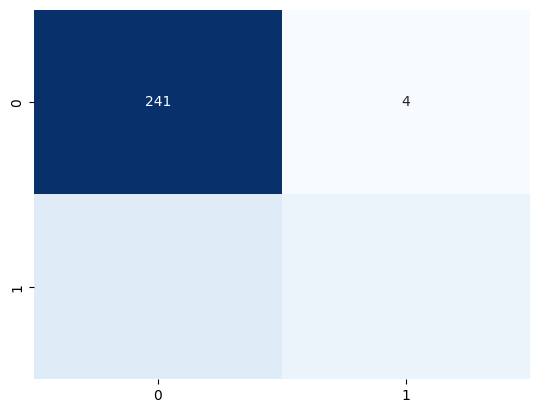

In [60]:
#Matrice de confusion
y_pred = rf_model.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
sns.heatmap(CM, annot=True, cbar=None, cmap="Blues",fmt="g")

In [61]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.81      0.35      0.49        49

    accuracy                           0.88       294
   macro avg       0.85      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



AUC is 0.8006663890045814


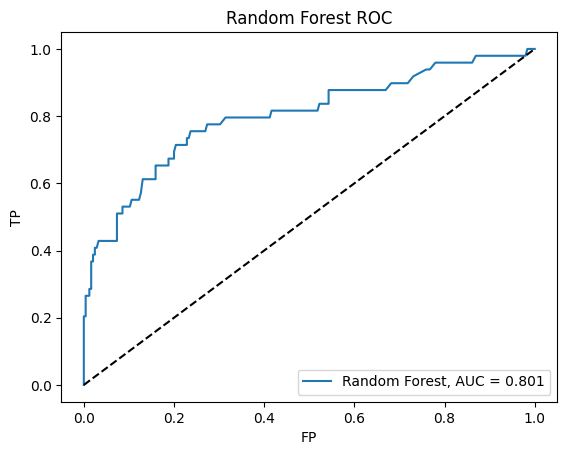

In [62]:
# ROC Curve
from sklearn import metrics
y_pred_proba = rf_model.predict_proba(x_test)[::,1]
AUC = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC is", AUC)
y_pred_proba = rf_model.predict_proba(x_test)[::, 1]
fp, tp, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fp, tp, label = "Random Forest, AUC = {:.3f}".format(AUC))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('Random Forest ROC')
plt.legend(loc=4)
plt.show()

## 5.2. Modèle des KNN

Pour le cas du KNN, il n'est pas recommandé d'utiliser le 'oversampling' car cela conduit généralement à un nombre de voisins optimal égal à 1 du fait de la duplication. De ce fait, nous allons réaliser dans ce cas un undersampling et donc diminuer les observations de la classe majoritaire

In [63]:
undersampler=RandomUnderSampler(random_state=42,sampling_strategy=0.5)
smote_train,smote_target = undersampler.fit_resample(x_train,y_train)

In [64]:
#Définition de la plage des paramètres
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [65]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [66]:

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
grid.fit(smote_train,smote_target)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [67]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [68]:
model=grid.best_estimator_

0.8469387755102041


<Axes: >

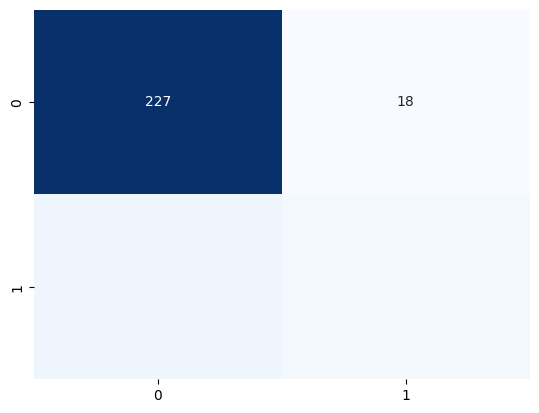

In [71]:
#Matrice de confusion
y_pred = model.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
sns.heatmap(CM, annot=True, cbar=None, cmap="Blues",fmt="g")

In [73]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       245
           1       0.55      0.45      0.49        49

    accuracy                           0.85       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.84      0.85      0.84       294



AUC is 0.7552686380674719


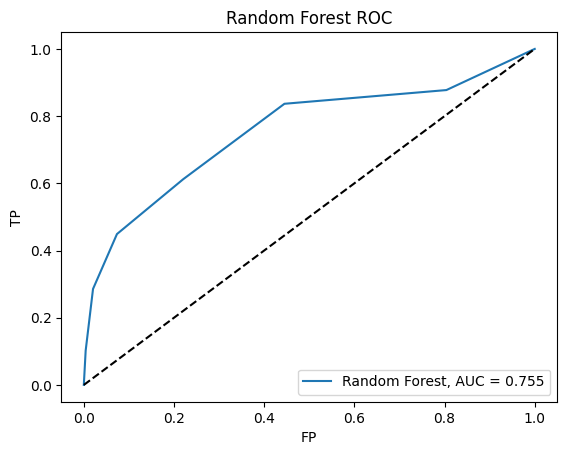

In [74]:
# ROC Curve
from sklearn import metrics
y_pred_proba = model.predict_proba(x_test)[::,1]
AUC = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC is", AUC)
y_pred_proba = model.predict_proba(x_test)[::, 1]
fp, tp, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fp, tp, label = "Random Forest, AUC = {:.3f}".format(AUC))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('Random Forest ROC')
plt.legend(loc=4)
plt.show()

In [75]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=np.arange(1,20), cv=cv
)

# Fit and show the visualizer
viz.fit(smote_train, smote_target)
viz.show()

ModuleNotFoundError: No module named 'yellowbrick'

# Modele pour l'application

In [78]:
import joblib
joblib.dump(rf_model,"rf_model.joblib")

['rf_model.joblib']